## Project 1 - Ordinary differential equations - Projectile motion in 2D

Due Monday, Nov 1, 9am.


1. Read the Project Marking Rubric Document on Canvas
2. See the Project 1 background document on Canvas

Consider a projectile of mass $m$ launchd at an angle $\theta$ to the horizontal from level ground. It reaches the ground some distance $d$ away from the launch site. The equation of motion of the projectile with atmospheric drag (at low enough speeds that no turbulence is created) is: $$ m \frac{d\vec{v}}{dt} = -m g \hat{y} -c\vec{v},$$
where $\vec{v}(t) = (v_x(t), v_y(t))$ is the projectile velocity at time $t$. The constant $c$ characterizes the atmospheric friction. (As an aside, if the motion of the projectile is fast enough that turbulence is created, the friction term changes to $-bv^2$). We will integrate the equation of motion numerically in this project. However, in this case, an analytic solution is possible. If we call $\vec{r}(t) = (x(t), y(t))$ the position of the projectile at time $t$, the equation of motion can be integrated to give:
$$x(t) =\frac{v_0v_T}{g}(1-e^{-gt/v_T}) \cos\theta $$
$$y(t) = \frac{v_T}{g} (v_T + v_0 \sin\theta)(1-e^{-gt/v_T}) - v_T t$$
where $v_T = mg/c$ is the terminal velocity, and $v_0$ is the initial speed.

Objectives: You will implement a numerical solution of the differential equation with `solve_ivp()` and compare the trajectory you find to the analytic solution above. When calling `solve_ivp()` use `method='LSODA'` as it is often better behaved than the default method. Use the analytic solution _only at the very end_, to plot along with the numerical solution. The analytic solution should not be used as part of the numerical solution.

Use the following parameters and initial conditions:
- $c$ = 0.65 kg/s
- $g$ = 9.81 m/2$^2$
- $m$ = 0.1 kg
- $v_0$ = 10 m/s
- $\theta$ = 50$^\circ$ above the horizonal

The questions you need to consider are:
- What is the distance $d$ to impact?
- What is the maximum height, $h$, reached?
- What is the time of flight, $T$?
- What is the velocity (which is a vector), $\vec{v}_I$ at the impact point?

Your code should determine answers to these questions from the data returned by `solve_ivp()`, and print them to the screen.
Your code should continue to operate well if parameters like $c,$ $m$, $v_0$, and $\theta$ are changed - it should choose a sensible range of times to integrate over based on the parameters used.

Make a plot that shows the trajectory in the $x, y$ plane. The numerical solution should be shown as a series of about 20 points that are evenly spaced in time (so that the distance between them communicates the speed of the projectile) that are not connected by lines. On the same plot, show the analytical solution as a solid line (without points).

Note that the grading for the projects will be very, very different from the grading of the exercises. **Read the project marking rubric document before you start.** Feel free to add additional cells below to split your code up if you wish to.

The projectile travelled 0.9866 meters in the x-direction
The projectile's maximum height was 0.7604 meters.
The time of flight was 0.9325 seconds.
The final velocity is the vector <0.0150,-1.4879> in meters per second.


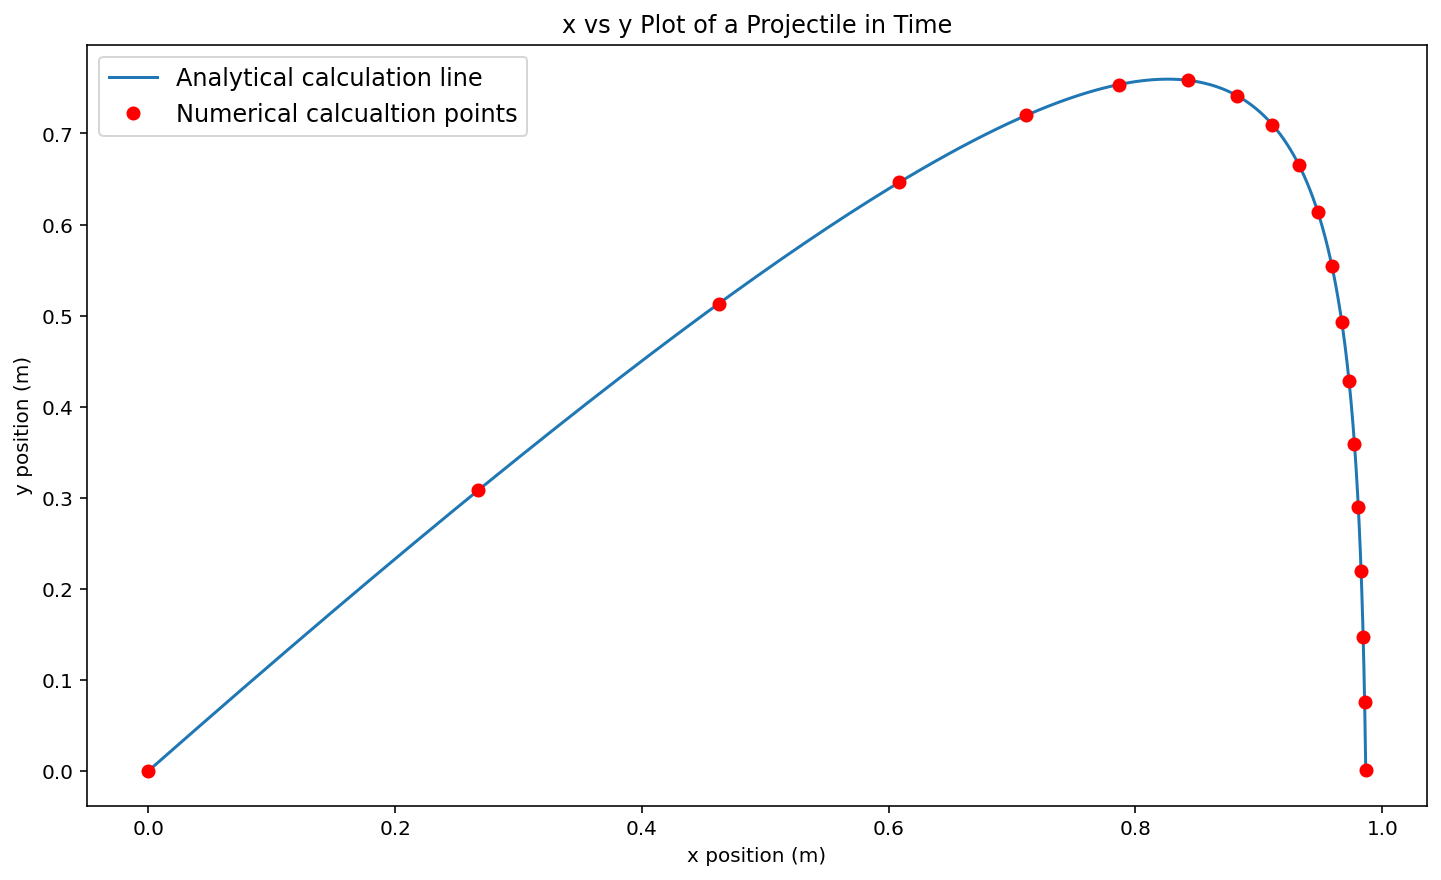

In [3]:
from scipy import integrate
import matplotlib.pyplot as plt
import numpy as np
"""
Solve the Ordinary Differential Equations (ODEs) for a projectile of
mass m launched at some angle t with an initial velocity. To do this we
use integrate.solve_ivp. We solve the differential equations for the
x postion, the y postions, the x velocity and the y velocity over a
time interval. In these cases we account for both gravity and air
resistance.


Set constants for air resistance, gravity, and mass. Set launch
conditions: initial velocity and angle from horizontal.

Functions:
    dvdtAF:
        The function to give the ODEs for x and y postions and
        x and y velocities
    x_int:
        The function to determine the x intercept of a line
        between two points

METHOD:
After defining a time interval and intial conditions, integrate.solve_ivp
gives postion and velocity values for each time step.
To find distance travelled, final velocity and time of flight it finds
the time that y=0 by finding the t intercept of the line between the
last positive value and first negative value of y. From this time, it
finds the aforementioned data. A similar process is used to find max
height. This time though, the line is between the last positive and
first negative y velocity. Its t-intercept corresponds to the time
v_y is 0 and height is maximized.
Finally an analytical approach is taken to calculate the x and y
values over the same time interval.

This program returns the x distance the projectile travels, the maximum
height, the time of flight, and the final velocity in vector notation.
It also returns a graphical plot of the numerical and analytical points.
The numerical data is portrayed as 20 evenly spaced points while the
analytical data isportrayed as a line. Only values when y is positive
are plotted.

"""
# CONSTANTS ==================================

c = 0.65                         # air resistance in kg/s
g = 9.81                         # gravitational acceleration in m/s^2
m = 0.1                          # mass in kg
v_0 = 10.0                       # initial velocity in m/s
a = 50                           # angle above horizontal in degrees
v_x = v_0*np.cos(np.radians(a))  # x component of initial velocity in m/s
v_y = v_0*np.sin(np.radians(a))  # y component of initial velocity in m/s

# FUNCTIONS ==================================


def dvdtAF(tF, valAF):

    """
    Calculates the derivative for all values at a time t from values in valAF

    Inputs:
        tF:
          The point in time that the derivatives will be calculated at

        valAF:
          An array of 4 values:
                x   - the x position of the projectile at tF
                y   - the y position of the projectile at tF
                v_x - the x velocity of the projectile at tF
                v_y - the y velocity of the projectile at tF
    Outputs:
        Array of 4 values:
                v_x -> the derivative of x
                v_y -> the derivative of y
                -c*v_x/m -> the derivative of v_x
                -g - c*v_y/m -> the derivative of v_y
    """
    x = valAF[0]
    y = valAF[1]
    v_x = valAF[2]
    v_y = valAF[3]
    return np.array([v_x, v_y, - c*v_x/m, - g - c*v_y/m])
    # returned values dx/dt, dy/dt, dv_x/dt and dv_y/dt


def x_int(x0, xf, y0, yf):
    """
    Find the x intercept from the equation of a line between two
    given points represented by (x0, y0) and (xf, yf)

    Inputs:
        x0: integer or float denoting the first point's x coordinate
        xf: integer or float denoting the second points's x coordinate
        y0: integer or float denoting the first point's y coordinate
        yf: integer or float denoting the second points's y coordinate
    Outputs:
        x: the x value when y equals zero -- the x intercept
    """
    rise = yf-y0
    run = xf-x0
    m = rise/run   # slope
    b = y0 - m*x0  # y_intercept
    x = -b/m
    return x       # x-intercept


# PROBLEM SOLUTION =============================

# Time Values
t_0 = 0            # intitial time in s
t_f = 2*v_y/g      # final time estimate in s (assumes no air resistance)
steps = 1000       # number of time points
tAF = np.linspace(t_0, t_f, steps)   # t values we want to perform integrals at

# intitial position and velocity values of projectile (x, y, v_x, v_y)
vals0AF = np.array([0, 0, v_x, v_y])

# ----------

# Solve data
sol = integrate.solve_ivp(dvdtAF, (tAF[0], tAF[-1]), vals0AF,
                          t_eval=tAF, method='LSODA')

t_points = sol['t']  # time points of integration
x = sol['y'][0]      # x position at each time point
y = sol['y'][1]      # y position at each time point
vx = sol['y'][2]     # x velocity at each time point
vy = sol['y'][3]     # y velocity at each time point

# ----------

# indices surrounding moment of impact
end = np.where(y > 0)[0][-1]  # the index of the last positive y value
neg = end + 1                 # the index of the first negative x value

# takes interval of idices and choses 20 evenely spaced out indices
pts = np.linspace(t_0, end, 20, dtype=int)

# ----------

"""
Calulation of important data such as:
    -x distance travelled
    -time of flight
    -final x velocity
    -final y velocity
    -max height
"""
# Finding impact values #
# time of impact, also time of flight
t_imp = x_int(t_points[end], t_points[neg], y[end], y[neg])
# realation between impact time and change between data points
f1 = (t_imp - t_points[neg])/(t_points[end] - t_points[neg])
# x distance travelled
d_imp = x[neg] + f1*(x[end]-x[neg])
# x velocity at impact
vx_imp = vx[neg] + f1*(vx[end]-vx[neg])
# y velocity at impact
vy_imp = vy[neg] + f1*(vy[end]-vy[neg])


# finding max height
vy_neg = np.argmax(y)  # first index where vy is negative
vy_pos = vy_neg - 1    # last index where vy is positive

# time when y velocity is zero, also time when height is maximized
vy_zero = x_int(t_points[vy_pos], t_points[vy_neg], vy[vy_pos], vy[vy_neg])
# realation between vy=0 time and change between data points
f2 = (t_imp-t_points[vy_neg])/(t_points[vy_pos]-t_points[vy_neg])
# maximum height of projectile
h_max = y[vy_neg] + f2*(y[vy_pos]-y[vy_neg])

# ----------

# Printing data from points of interest
print("""The projectile travelled {0:3.4f} meters in the x-direction
The projectile's maximum height was {1:3.4f} meters.
The time of flight was {2:3.4f} seconds.
The final velocity is the vector <{3:3.4f},{4:3.4f}> in meters per second."""
      .format(d_imp, h_max, t_imp, vx_imp, vy_imp))


# ANALYTICAL CHECK =====================

v_term = m*g/c  # terminal velocity of projectile in m/s


def x_func(tAF):
    """
    Analytical calculation of x positions over all t values

    Inputs:
        tAf:
            a numpy array of arbitry size of all time values
            to calculate over

    Outputs:
        a numpy array of equal size to tAF containing the y
        positions for corresponding t points in tAF
    """
    return v_0*v_term/g*(1 - np.exp(-g*tAF/v_term))*np.cos(np.radians(a))


def y_func(tAF):
    """
    Analytical calculation for y positions over all t values

    Inputs:
        tAf:
            a numpy array of arbitry size of all time values
            to calculate over

    Outputs:
        a numpy array of equal size to tAF containing y positions
        for corresponding t points in tAF
    Note: equation is split into 3 parts to avoid having a line too long
    """
    pt1 = v_term/g*(v_term + v_0*np.sin(np.radians(a)))
    pt2 = (1 - np.exp(-g*tAF/v_term))
    pt3 = v_term*tAF
    return pt1*pt2 - pt3


xAF = x_func(tAF)  # analytical values for x
yAF = y_func(tAF)  # analytical values for y

# Plotting analytical data
plt.plot(xAF[yAF >= 0], yAF[yAF >= 0], 
         label="Analytical calculation line")

# Plotting numerical data (plotted here so points appear on top of line)
plt.title("x vs y Plot of a Projectile in Time")
plt.xlabel("x position (m)")
plt.ylabel("y position (m)")
plt.plot(x[:end+1][pts], y[:end+1][pts], "ro",
         label="Numerical calcualtion points")

plt.legend(fontsize="large")
plt.show()

# Acknowledgements
Please describe the role of **anyone other than yourself** who contributed to the work shown in this notebook. 

Its ok to get help from us and classmates! Please get in the habit of acknowledging such contributions.

If you want to refer to a classmate, please use only their cocalc email-id and not their name - or you could just say something like: "a classmate gave me the idea to use xxx feature to solve yyy problem."





Max helped me with indexing my data points with [y>0]
He also helped me with the prasing for my docstrings

Grey gave me the idea to use linear approximation to find exactly when the projectile hit the ground and when it reached the maximum height. She also helped me with using the relation between the points oneither side and the time itself.


All solution code for the main project question should appear above this cell.
Project extensions should appear in the cell below.

In [2]:
# OPTIONAL project extension (which can call functions in your code above if desired) here.
# YOUR CODE HERE
raise NotImplementedError()

NotImplementedError: 

# Extension Description

Please describe any new language features or project extension you have implemented in this cell.



Code executes - grader use only

YOUR ANSWER HERE

In [20]:
# pep8 returns warnings or errors
# You may need to hit 'Save' after making changes for them to take effect.
nb_name = "project1.ipynb"
cells_to_check = []
cells_to_exclude = ['cell-style', 'cell-optimization0']
stop_at = ['cell-extension']

# check_style.py uses cells_to_check and nb_name
%run -i check_style2.py


checking cell: cell-project1-main


<Figure size 864x504 with 0 Axes>

Results Grade - grader use only

YOUR ANSWER HERE

Comments, naming, readability - grader use only

YOUR ANSWER HERE

Plots - grader use only

YOUR ANSWER HERE

Code compactness and organization - grader use only

YOUR ANSWER HERE

The projectile travelled 0.9866 meters in the x-direction
The projectile's maximum height was 0.7604 meters.
The time of flight was 0.9325 seconds.
The final velocity is the vector <0.0150,-1.4879> in meters per second.


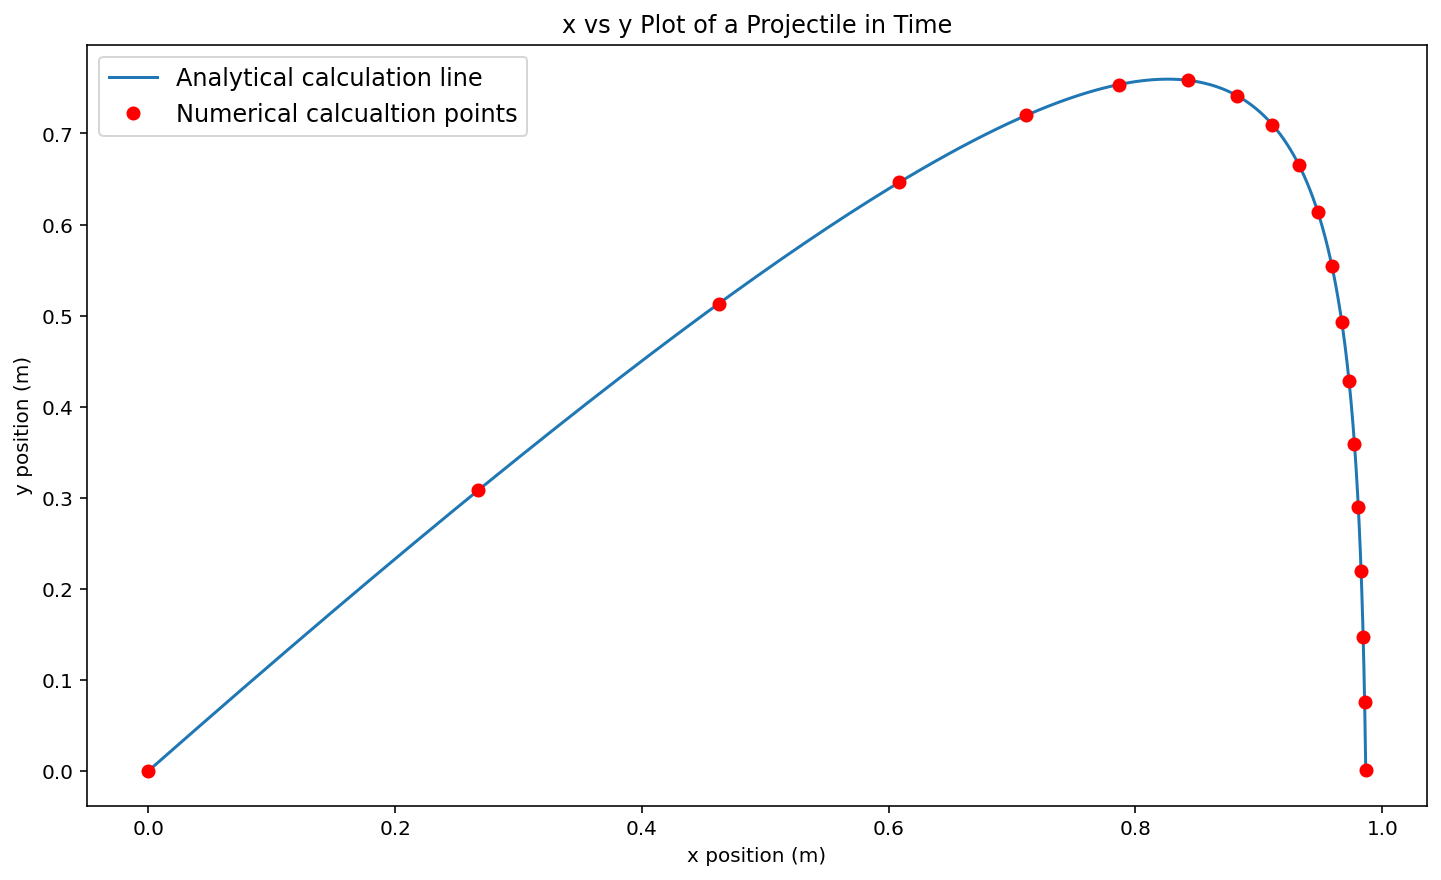

Time for cell: cell-project1-main time: 0.26
Total time: 0.26


<Figure size 864x504 with 0 Axes>

In [27]:
# Code optimization/speed
cells_to_time = []
cells_to_exclude = ['cell-style', 'cell-optimization0']
stop_at = ['cell-extension']
# also uses nb_name
%run -i time_cells2.py

Code optimization/timing - grader use only

YOUR ANSWER HERE

New Functionality/Language features - grader use only

YOUR ANSWER HERE